In [2]:
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import cv2

from astropy import coordinates as coords

In [3]:
data = fits.open("/Volumes/Backup Plus/Lohith_Files/Lensing_detection_data/SDSS_data/lens/z_000001.fits")
image = data[0].data

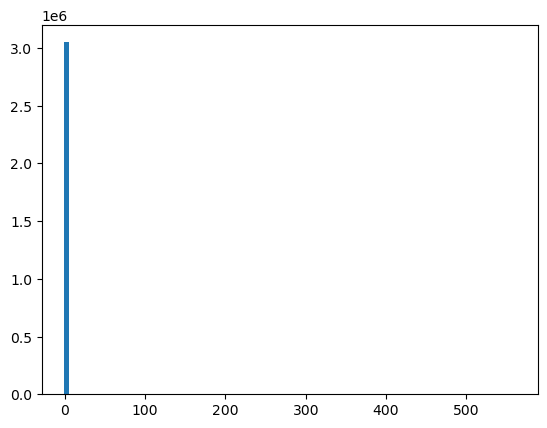

In [4]:
_=plt.hist(image.flatten(),bins=100)

In [5]:
_[0].cumsum()/sum(_[0]), _[1][:20], 

(array([0.99943564, 0.99970815, 0.9998062 , 0.99985801, 0.99988523,
        0.99990556, 0.99991966, 0.99993081, 0.99994032, 0.99994983,
        0.99995639, 0.99995901, 0.9999613 , 0.99996426, 0.99996655,
        0.99996917, 0.99997114, 0.99997409, 0.99997442, 0.99997639,
        0.99997737, 0.99998   , 0.99998131, 0.9999836 , 0.99998459,
        0.9999859 , 0.99998656, 0.99998754, 0.99998819, 0.99998852,
        0.99998885, 0.99998983, 0.99999016, 0.99999016, 0.99999115,
        0.9999918 , 0.99999246, 0.99999246, 0.99999344, 0.99999344,
        0.99999377, 0.9999941 , 0.9999941 , 0.99999443, 0.99999475,
        0.99999475, 0.99999508, 0.99999508, 0.99999541, 0.99999541,
        0.99999574, 0.99999574, 0.99999639, 0.99999672, 0.99999672,
        0.99999672, 0.99999672, 0.99999705, 0.99999705, 0.99999705,
        0.99999705, 0.99999738, 0.9999977 , 0.99999803, 0.99999803,
        0.99999836, 0.99999836, 0.99999836, 0.99999836, 0.99999836,
        0.99999869, 0.99999869, 0.99999869, 0.99

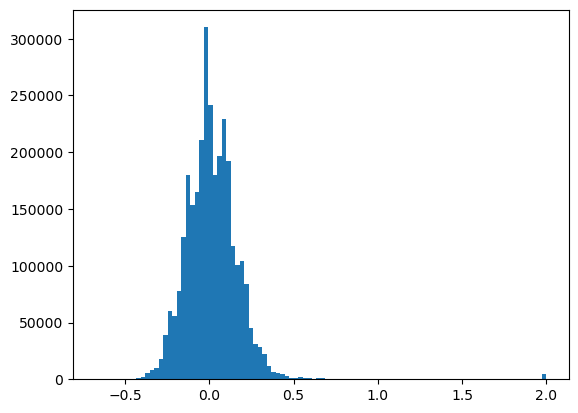

In [6]:
_=plt.hist(np.clip(image.flatten(),a_min=-100, a_max=2),bins=100) # This shows that the pixel values range from [-0.5, 0.5]

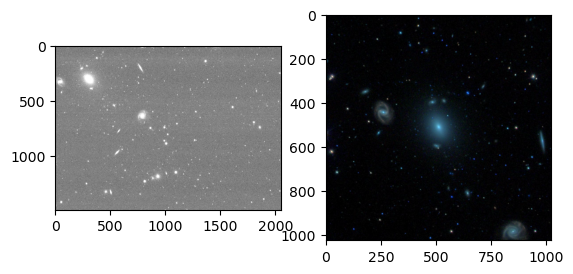

In [19]:
clipped_image = np.clip(image, -0.5, 0.5)
# jpg_img = cv2.imread("/Volumes/Backup Plus/Lohith_Files/Lensing_detection_data/SDSS_data/lens/000001.jpg")
jpg_img = cv2.imread("./lens.jpg")

jpg_img = cv2.rotate(jpg_img, cv2.ROTATE_90_CLOCKWISE)



plt.subplot(1,2,1)
plt.imshow(clipped_image,cmap="gray")

plt.subplot(1,2,2)
plt.imshow(jpg_img[::-1])

In [9]:
import os
import requests

CATALOG = pd.read_csv("./reference_csv/lens.csv") 
ra, dec = CATALOG.iloc[0]["ra"], CATALOG.iloc[0]["dec"]
pos = coords.SkyCoord(ra, dec, unit="deg", frame="icrs")

#JPEG
url = f"https://skyserver.sdss.org/dr17/SkyServerWS/ImgCutout/getjpeg?ra={ra}&dec={dec}&scale=0.4&width=1024&height=1024"
r = requests.get(url)
open("lens.jpg", "wb").write(r.content)

82689

In [9]:
print(url)

https://skyserver.sdss.org/dr17/SkyServerWS/ImgCutout/getjpeg?ra=179.04298400878906&dec=60.52251815795898&scale=0.4&width=256&height=256


In [ ]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

ra, dec = CATALOG.iloc[0]["ra"], CATALOG.iloc[0]["dec"]

query_bands = ["u", "g", "r", "i", "z"]

pos = coords.SkyCoord(ra, dec, unit="deg", frame="icrs")
offset = coords.SkyCoord(-20,-20,unit="sec")
print(pos)
result = SDSS.query_region(pos, radius=2* u.arcsec)

#FITS
if result:
    for b in query_bands:
        try:
            imgs = SDSS.get_images(coordinates=pos, radius=20*u.arcsec, band=b, data_release=17)
            imgs[0].writeto(os.path.join("./", f"test_{b}.fits"), overwrite=True)
        except:
            print("image not found :", 0)
            IMAGE_FAIL += [0]

<SkyCoord (ICRS): (ra, dec) in deg
    (239.45672607, 16.31018066)>
